Load some libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Provide input paths to data files (might need to be changed)

In [2]:
data_hosts_path = '../kaggle/input/olympic-games-medals-19862018/olympic_hosts.csv'
data_medals_path = '../kaggle/input/olympic-games-medals-19862018/olympic_medals.csv'
data_results_path = '../kaggle/input/olympic-games-medals-19862018/olympic_results.csv'
data_athletes_path = '../kaggle/input/olympic-games-medals-19862018/olympic_athletes.csv'

Load the hosts dataset (general data about each olympics game)

In [3]:
df_hosts = pd.read_csv(data_hosts_path)
df_hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


Load the medals dataset (who won what medals, and in what olympics)

In [4]:
df_medals = pd.read_csv(data_medals_path)
df_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


Let's merge medals and hosts data to see how data can be merged

In [5]:
data = df_medals.merge(df_hosts, how='left', left_on='slug_game', right_on='game_slug')
data['athlete_full_name'] = data['athlete_full_name'].str.title()
data.drop(['slug_game', 'game_slug', 'game_name', 'game_end_date', 'game_start_date'], inplace=True, axis=1)
data.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Winter,2022


Medals for Athletics

In [6]:
data_athlete = data[data['participant_type']=='Athlete']
data_team = data[data['participant_type']=='GameTeam']
data_team_a = data_team[data_team['athlete_full_name'].isna()]
group_columns = ['discipline_title', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title',
                 'country_name', 'country_3_letter_code', 'game_location', 'game_season', 'game_year']
agg_columns = ['country_code', 'athlete_full_name']
data_team_b = data_team[data_team['athlete_full_name'].notna()].groupby(group_columns)[agg_columns].agg(lambda x: set(x)).reset_index()
data_medal = pd.concat([data_team_a, data_team_b, data_athlete], axis=0).reset_index(drop=True)
data_medal

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_season,game_year
0,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Winter,2022
1,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Winter,2022
2,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Winter,2022
3,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Winter,2022
4,Curling,Men,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,Weightlifting,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Summer,1896
20213,Weightlifting,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,NaN,Alexandros Nikolopoulos,Greece,GR,GRE,Greece,Summer,1896
20214,Weightlifting,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Summer,1896
20215,Weightlifting,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/launceston-el...,Launceston Elliot,Great Britain,GB,GBR,Greece,Summer,1896


In [7]:
data_summer = data_medal[data_medal['game_season']=='Summer'].reset_index(drop=True)

In [8]:
data_summer.drop('game_season', axis=1, inplace=True)
data_summer.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_year
0,Canoe Sprint,Men's Kayak Four 500m,Men,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER,Japan,2020
1,Canoe Sprint,Men's Kayak Four 500m,Men,SILVER,GameTeam,Spain,NaN,NaN,Spain,ES,ESP,Japan,2020
2,Canoe Sprint,Men's Kayak Four 500m,Men,BRONZE,GameTeam,Slovakia,NaN,NaN,Slovakia,SK,SVK,Japan,2020
3,Canoe Sprint,Women's Kayak Four 500m,Women,GOLD,GameTeam,Hungary,NaN,NaN,Hungary,HU,HUN,Japan,2020
4,Canoe Sprint,Women's Kayak Four 500m,Women,SILVER,GameTeam,Belarus,NaN,NaN,Belarus,BY,BLR,Japan,2020


Only gold medals

In [9]:
data_summer_gold = data_summer[data_summer['medal_type'] == 'GOLD']
data_summer_gold.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_year
0,Canoe Sprint,Men's Kayak Four 500m,Men,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER,Japan,2020
3,Canoe Sprint,Women's Kayak Four 500m,Women,GOLD,GameTeam,Hungary,NaN,NaN,Hungary,HU,HUN,Japan,2020
6,Football,Women,Women,GOLD,GameTeam,Canada,NaN,NaN,Canada,CA,CAN,Japan,2020
9,Football,Men,Men,GOLD,GameTeam,Brazil,NaN,NaN,Brazil,BR,BRA,Japan,2020
12,Artistic Swimming,Team,Women,GOLD,GameTeam,ROC,NaN,NaN,ROC,ROC,ROC,Japan,2020


In [10]:
country_gold_total = data_summer_gold.groupby(['country_name', 'discipline_title', 'event_gender', 'game_year'])['participant_type'].count().reset_index().rename(columns={'participant_type':'total_medals'})

country_gold_total = country_gold_total.sort_values('game_year', ascending=True)

athletics_women = country_gold_total[(country_gold_total['discipline_title'] == 'Athletics') & (country_gold_total['event_gender'] == 'Women')]
athletics_women = athletics_women.drop(['discipline_title', 'event_gender'], axis=1)
athletics_women.head()

,country_name,game_year,total_medals
2887,United States of America,1928,1
892,Germany,1928,1
2095,Poland,1928,1
299,Canada,1928,2
2888,United States of America,1932,5


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"       # URL of the Wikipedia page of olympic games 2024

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

participating_countries_section = soup.find(id="Participating_National_Olympic_Committees")
countries = []
if participating_countries_section:
    ul = participating_countries_section.find_next('ul')
    if ul:
        li_tags = ul.find_all('li')
        for li in li_tags:
            country = li.text.split('(')[0].strip()
            countries.append(country)

df = pd.DataFrame(countries, columns=["Country"])
df.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra


See the difference between which countries will participate and which ones won't

In [12]:
countires_2024 = set(df['Country'])
countries_before = set(country_gold_total['country_name'])

print('before - 2024', countries_before - countires_2024)
print('2024 - before', countires_2024 - countries_before)

before - 2024 {"People's Republic of China", 'Czechoslovakia', "Côte d'Ivoire", 'German Democratic Republic (Germany)', 'Serbia and Montenegro', "Democratic People's Republic of Korea", 'United States of America', 'Belarus', 'Soviet Union', 'Yugoslavia', 'Australasia', 'Republic of Korea', 'Russian Federation', 'Syrian Arab Republic', 'Islamic Republic of Iran', 'Unified Team', 'Independent Olympic Athletes', 'Hong Kong, China', 'Federal Republic of Germany', 'ROC', 'MIX'}
2024 - before {'Andorra', 'Yemen', 'Botswana', 'Republic of the Congo', 'Angola', 'Myanmar', 'Mauritius', 'Sierra Leone', 'Solomon Islands', 'Guinea', 'Guyana', 'China', 'Gabon', 'Namibia', 'Marshall Islands', 'Guinea-Bissau', 'Eswatini', 'Mali', 'Kuwait', 'American Samoa', 'Bhutan', 'Madagascar', 'Cayman Islands', 'Liberia', 'Nauru', 'Cambodia', 'Bosnia and Herzegovina', 'Saint Vincent and the Grenadines', 'Honduras', 'Cyprus', 'East Timor', 'Guam', 'Palestine', 'Nepal', 'Central African Republic', 'Lebanon', 'Antig

In [13]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression

medal_preds = {}
r_squared_values = {}

countries = set(athletics_women['country_name'])
for country in countries:
    athletics_women_country = athletics_women[athletics_women['country_name'] == country]
    athletics_women_country = athletics_women_country.drop(['country_name'], axis=1).reset_index(drop=True)

    min_year = athletics_women_country['game_year'].min()
    max_year = 2020

    expected_years = list(range(min_year, max_year + 1, 4))

    for year in expected_years:
        if year not in athletics_women_country['game_year'].values:
            athletics_women_country = athletics_women_country.append({
                'game_year': year,
                'total_medals': 0.0
            }, ignore_index=True)

    if len(athletics_women_country) > 1:
        athletics_women_country['normalized_year'] = (athletics_women_country['game_year'] - athletics_women_country['game_year'].min()) / 4
        model = LinearRegression()
        X = athletics_women_country[['normalized_year']]
        y = athletics_women_country['total_medals']
        model.fit(X,y)

        r_squared = model.score(X, y)
        r_squared_values[country] = r_squared

        next_year_norm = athletics_women_country['normalized_year'].max() + 1
        predicted_medals = np.round(model.predict(np.array([[next_year_norm]])))
        medal_preds[country] = predicted_medals[0]
        # if country == 'Bulgaria':
        #     plt.figure(figsize=(10, 6))
        #     plt.scatter(athletics_women_country['game_year'], athletics_women_country['total_medals'], color='blue', label='Actual data')
        #     plt.plot(athletics_women_country['game_year'], model.predict(X), color='red', label='Regression Line')
        #     plt.scatter(2024, predicted_medals, color='green', label='Predicted Medals (1956)')
        #     plt.xlabel('Game Year')
        #     plt.ylabel('Total Medals')
        #     plt.title('Linear Regression on Olympic Medals', country)
        #     plt.legend()
        #     plt.grid(True)
        #     plt.show()

print(medal_preds)


/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append me

{'Italy': 0.0, "People's Republic of China": 1.0, 'Sweden': -0.0, 'Netherlands': 0.0, 'Hungary': -0.0, 'Portugal': -0.0, 'Bahrain': -0.0, 'Cameroon': -1.0, 'Romania': -0.0, 'Canada': -0.0, 'Czechoslovakia': -0.0, 'Mozambique': -0.0, 'Kenya': 2.0, 'Greece': 0.0, 'Nigeria': -0.0, 'German Democratic Republic (Germany)': -2.0, 'New Zealand': 0.0, 'Poland': 1.0, 'Colombia': -1.0, 'United States of America': 5.0, 'Belarus': -1.0, 'Soviet Union': -1.0, 'Austria': -0.0, 'Norway': -0.0, 'Croatia': 0.0, 'France': 0.0, 'Japan': -0.0, 'Brazil': -0.0, 'Spain': -1.0, 'Russian Federation': 0.0, 'Germany': 1.0, 'Morocco': -0.0, 'Syrian Arab Republic': -0.0, 'Bulgaria': -0.0, 'Cuba': 0.0, 'Unified Team': -1.0, 'Tunisia': -1.0, 'Algeria': -0.0, 'South Africa': 0.0, 'Kazakhstan': -0.0, 'Australia': -0.0, 'Belgium': 0.0, 'Jamaica': 3.0, 'Federal Republic of Germany': -1.0, 'Ethiopia': 1.0, 'Finland': -0.0, 'Bahamas': 0.0, 'Czech Republic': -0.0, 'Great Britain': 1.0, 'Ukraine': -0.0}


/home/beimukvo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  athletics_women_country = athletics_women_country.append({
/tmp/ipykernel_7413/3239238198.py:19: FutureWarning: The frame.append method is deprecated and will be removed fro

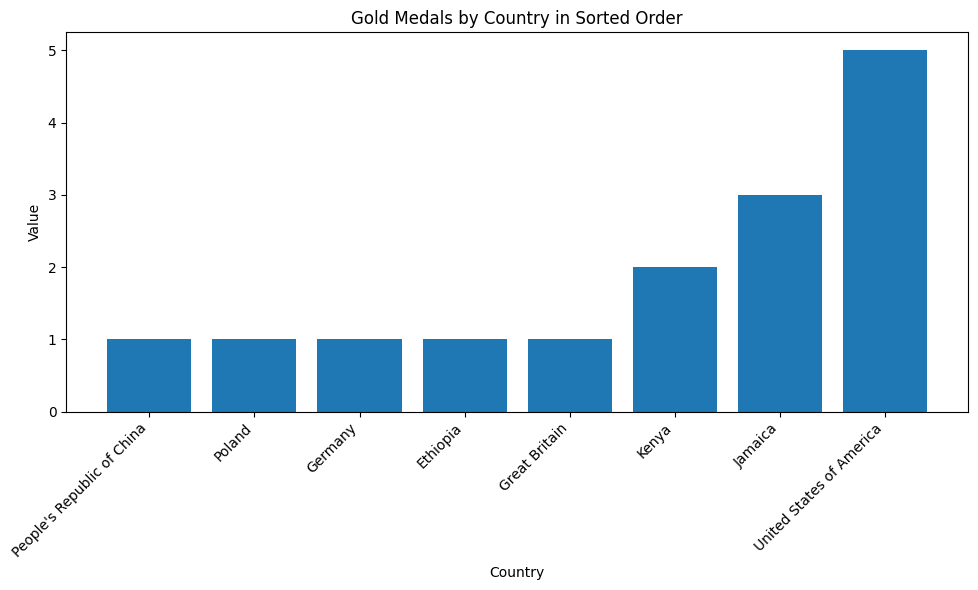

In [14]:
medal_preds
filtered_data = {k: v for k, v in medal_preds.items() if k not in ['Soviet Union', 'German Democratic Republic (Germany)', 'Russian Federation', 'Unified Team', 'Federal Republic of Germany', 'ROC']}
sorted_data = dict(sorted(filtered_data.items(), key=lambda item: item[1]))
sorted_data = dict(list(sorted_data.items())[-8:])

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_data.keys(), sorted_data.values())
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Gold Medals by Country in Sorted Order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
# Calculate the average R-squared value
average_r_squared = np.mean(list(r_squared_values.values()))


# Display the average R-squared value
average_r_squared

0.31047801663894226